In [3]:
import pandas as pd
import numpy as np
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [4]:
cData = pd.read_pickle("../curtaedAllergenData/all_cliData_10032020.pkl")
mapDa = pd.read_csv("../Allergen data/QBB_sample_ID_mapping_Allergen-IgE_2019-12-12_MR.csv")

In [5]:
cData.head(10)

,SampleType,Group,Sample,Test,Resp,Conc,%CVResp,%CVConc)
0,1=CC,114083,CC-1,a_IgE,338.127200000000000,0.746358756010291,0.00000,0.00000
1,2=CC,114084,CC-2,a_IgE,6774.706500000000000,19.149101607404400,0.00000,0.00000
2,3=QC,114085,sIgE M,t3,3694.655000000000000,9.331232433021910,0.00000,0.00000
3,4=QC,114089,sIgE L,e1,1246.069900000000000,2.899104558561600,0.00000,0.00000
4,5=QC,114090,sIgE Neg,d1,20.013500000000000,0.007626248354671,0.00000,0.00000
5,6=QC,114091,IQC271119,d1,6338.754400000000000,17.618579559304100,0.00000,0.00000
6,7=SAM,113266,011990000646,fx5,34.426700000000000,0.208668481908193,0.00000,0.00000
7,8=SAM,113265,011990000646,phad,34.117500000000000,0.205033469003163,0.00000,0.00000
8,9=SAM,113267,011990000646,fx1,16.951300000000000,0.001104005729673,0.00000,0.00000
9,10=SAM,113268,011990000646,fx2,19.495700000000000,0.031926326632585,0.00000,0.00000


In [6]:
# mapDa[['QBB_DUMMY_ID','PATH_SAMPLE_ID ']]
for idx in mapDa.index:
    mapDa.loc[idx,'Sample'] = ''.join(mapDa.loc[idx,'PATH_SAMPLE_ID '].split("-"))

In [7]:
mapDa_1 = mapDa[['QBB_DUMMY_ID','SIDRA-RES_3DIGIT_SAMPLE_NO']].set_index('SIDRA-RES_3DIGIT_SAMPLE_NO')
mapDa_1.head()

,QBB_DUMMY_ID
SIDRA-RES_3DIGIT_SAMPLE_NO,
101,SIR000037000780
102,SIR000037000142
103,SIR000037000275
104,SIR000037000009
105,SIR000037000702


In [8]:
cData[cData.SampleType.str.contains('SAM')].shape

(7342, 8)

In [9]:
cData.Conc = cData.Conc.astype('float')

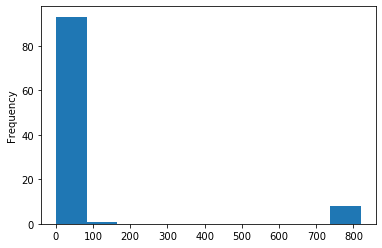

In [10]:
cData.Test.value_counts().plot(kind="hist")

In [11]:
cData.Test.value_counts()[cData.Test.value_counts()>700]
test_t = cData.Test.value_counts()[cData.Test.value_counts()>700].keys()

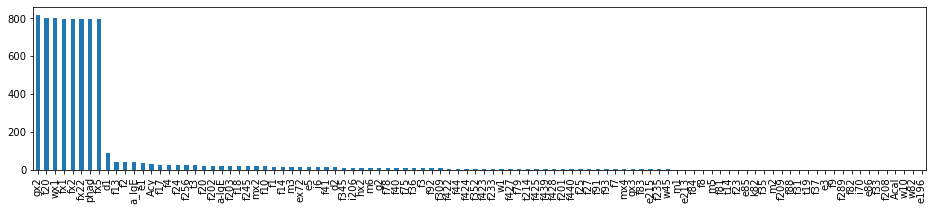

In [12]:
cData.Test.value_counts().plot(kind="bar",figsize=(16,3))

In [13]:
tx = cData[cData.Test.isin(test_t)].groupby(['Sample','Test'])['Conc'].agg('mean').unstack()

Text(0.5, 0, 'Test Class')

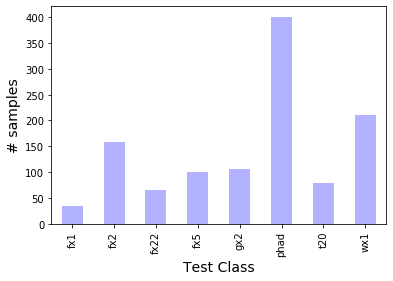

In [14]:
tx[tx>0.3].fillna(0).astype(bool).sum().plot(kind="bar",color="blue",alpha=0.3)
plt.ylabel("# samples",fontsize=14)
plt.xlabel("Test Class", fontsize=14)

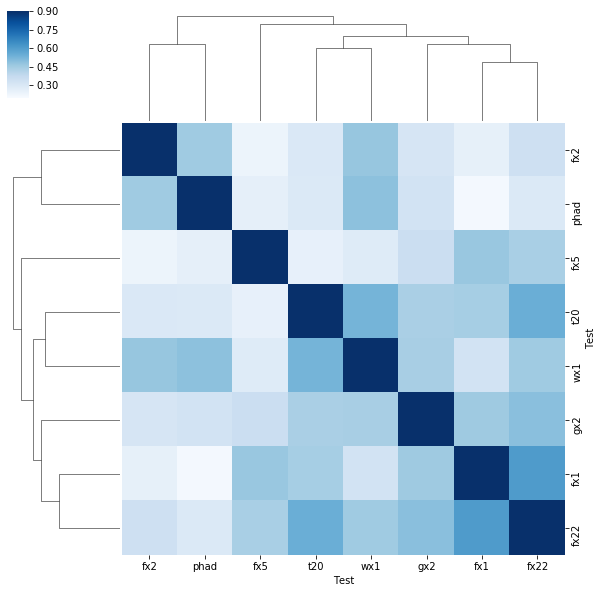

In [15]:
sns.clustermap(tx[tx>0.3].fillna(0).astype(bool).corr(),vmin=0.2,vmax=0.9,cmap="Blues")

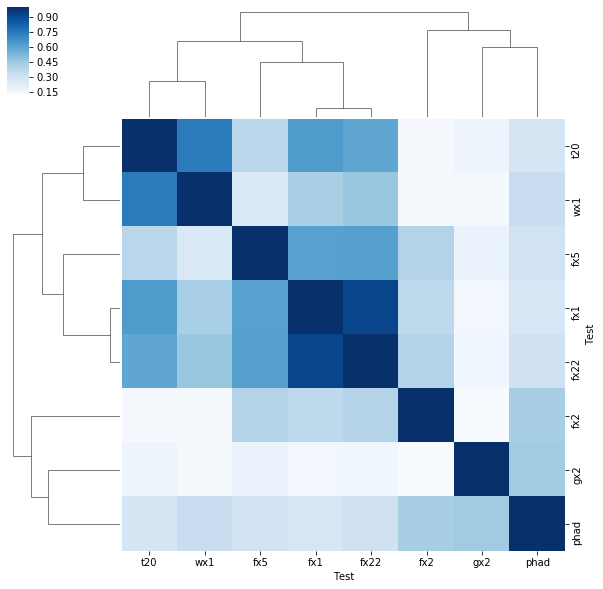

In [16]:
sns.clustermap(tx.corr(),cmap="Blues")

Text(0, 0.5, '# Sample ')

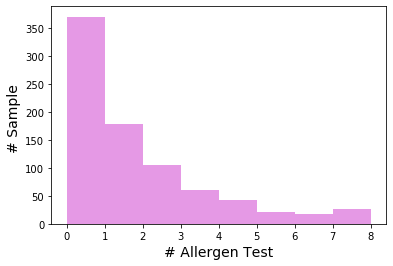

In [17]:
tx[tx>=0.3].fillna(0).astype(bool).sum(axis=1).plot(kind="hist",color="m",alpha=0.4,bins=8)
plt.xlabel("# Allergen Test",fontsize=14)
plt.ylabel("# Sample ",fontsize=14)

In [18]:
tx['id3d'] = [i[-3:] for i in tx.reset_index()['Sample']]

In [19]:
tx_r = tx.set_index('id3d').join(mapDa_1)

In [20]:
tx_qbb = tx_r.drop(tx_r[tx_r.QBB_DUMMY_ID.isnull()].index)
tx_qbb.shape

(797, 9)

In [21]:
tx_qbb = tx_qbb.set_index('QBB_DUMMY_ID')

In [22]:
tx_qbb.head()

,fx1,fx2,fx22,fx5,gx2,phad,t20,wx1
QBB_DUMMY_ID,,,,,,,,
SIR000037000780,0.004688,0.030764,0.158547,0.040405,0.061567,0.182508,0.029467,0.142290
SIR000037000142,0.000000,0.070241,0.129783,0.089441,0.063238,0.320504,0.016894,0.205851
SIR000037000275,0.355763,1.596741,0.403655,0.533030,0.283591,1.395833,0.129739,0.503114
SIR000037000009,0.038830,0.000000,0.147813,0.122652,0.094520,0.209529,0.000000,0.155590
SIR000037000702,0.068248,0.000000,0.166260,0.134755,0.073208,1.589408,0.391426,0.457234


In [23]:
tx_qbb = tx_qbb.astype(float)

In [24]:
tx_qbb.to_pickle("../curtaedAllergenData/AllergenType_QBB.pkl")

In [170]:
tx_qbb_pos1 = tx_qbb[tx_qbb[tx_qbb>=0.3].fillna(0).astype(bool).sum(axis=1)>0]

In [171]:
tx_qbb_pos1.shape

(447, 8)

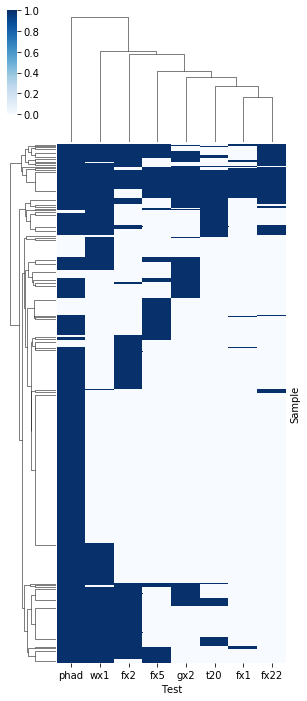

In [172]:
sns.clustermap(tx_pos1[tx_pos1>=0.3].fillna(0).astype(bool),cmap="Blues",\
               vmin=0,vmax=1,figsize=(5,12),yticklabels='')

In [173]:
tx_qbb_pos1.head()

,fx1,fx2,fx22,fx5,gx2,phad,t20,wx1
QBB_DUMMY_ID,,,,,,,,
SIR000037000142,0.000000,0.070241,0.129783,0.089441,0.063238,0.320504,0.016894,0.205851
SIR000037000275,0.355763,1.596741,0.403655,0.533030,0.283591,1.395833,0.129739,0.503114
SIR000037000702,0.068248,0.000000,0.166260,0.134755,0.073208,1.589408,0.391426,0.457234
SIR000037000006,0.003941,0.000000,0.199718,0.052406,0.080378,0.534766,0.001875,0.179422
SIR000037000157,0.020086,3.641496,0.235219,0.130267,0.140340,1.283758,0.035573,0.241123


In [184]:
qbb_spp = pd.read_pickle("../../QBBData/Data_PhipSeq_BWH/merge_800_10Feb2020/species_score.pkl",compression='gzip')
virCut = pd.read_csv("../../QbbBMI_Project/curatedData/VirscanThreshold_3Feb2020.csv")
qbbmData = pd.read_csv("../../QBBData/MetaData/MAPPING_DUMMYID_BamID_age_gender_eth.csv").set_index('PROJECT_DUMMY_ID')

In [189]:
igE = pd.read_csv("../../AllergenAutiAb_IgE_Sep2019/QBBIgE_IU_MR_July182019.csv")

In [190]:
igE.

(803, 4)

In [185]:
len(set(tx_qbb.index).intersection(set(qbbmData.index)))

797

In [1]:
qbbmData.loc[tx_qbb_pos1.index][['BodyFat - BMI','Gender','Age']]

NameError: name 'qbbmData' is not defined

In [ ]:
hlsc = pd.read_cs